In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [73]:
df = pd.read_csv('diabetes.csv')

In [74]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values # same as df['Outcome'].values

In [75]:
# standardize the data, as the values are not in the same range
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [76]:
# oversampling as number of diabetics is less than non-diabetics
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

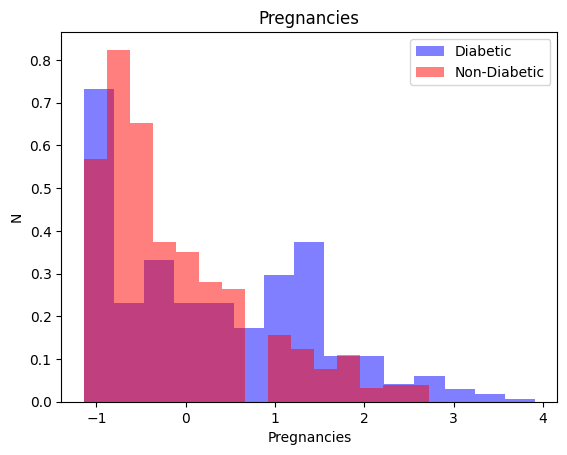

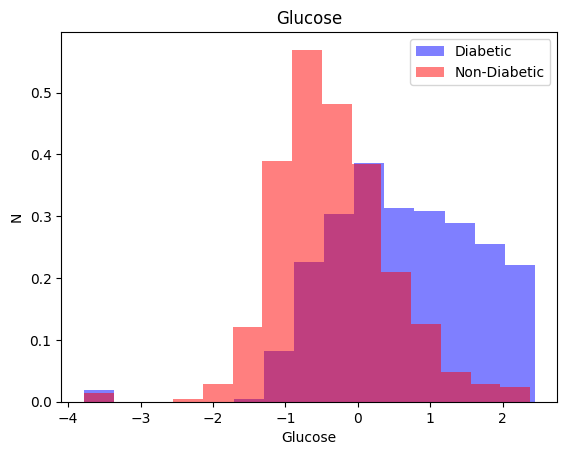

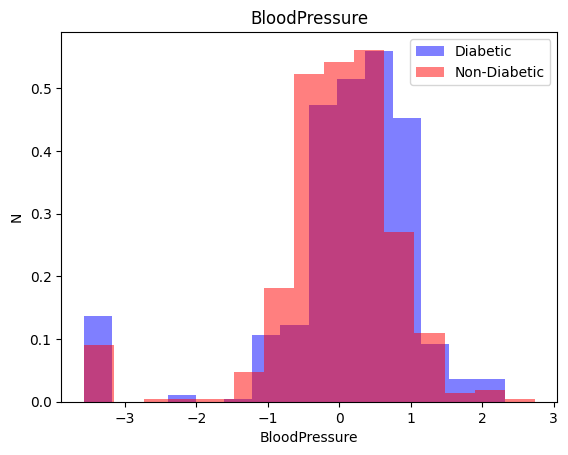

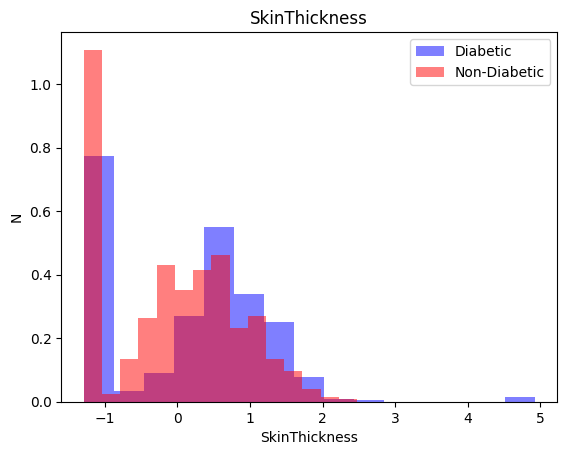

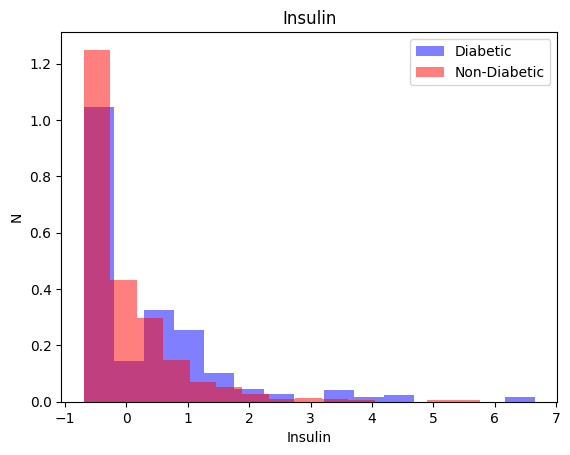

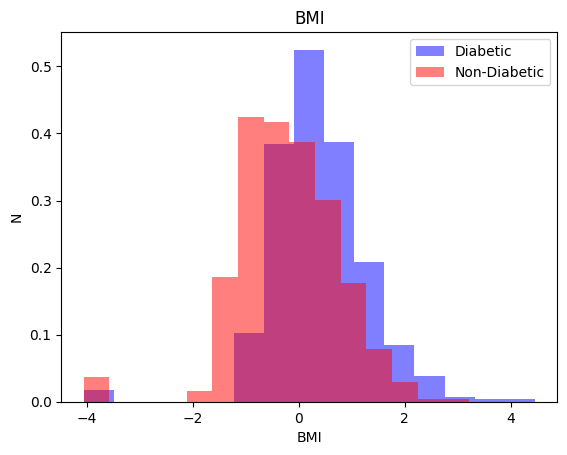

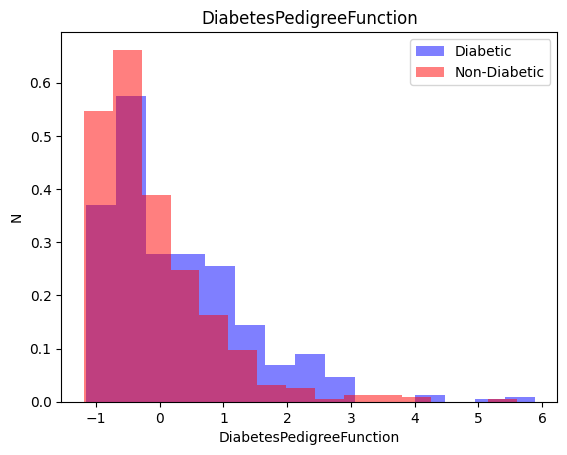

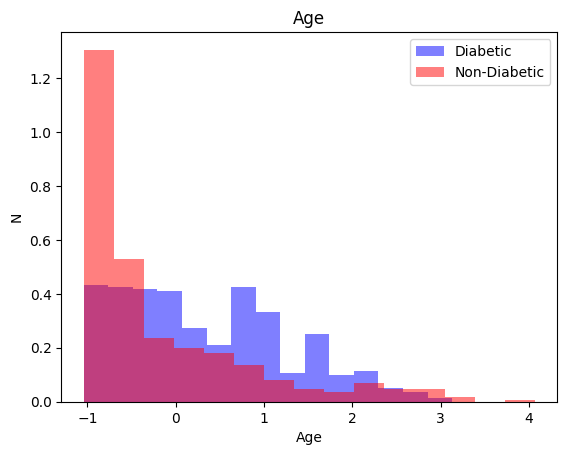

In [77]:
for i in range(len(transformed_df.columns[:-1])):
    label = transformed_df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color='blue', label='Diabetic', alpha=0.5, bins=15, density=True) #setting density to True normalizes the data
    plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color='red', label='Non-Diabetic', alpha=0.5, bins=15, density=True)
    plt.title(label)
    plt.ylabel('N')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [78]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid is used for binary classification
])

In [92]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [93]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=16)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6275 - loss: 0.6339 - val_accuracy: 0.7200 - val_loss: 0.5569
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7370 - loss: 0.5432 - val_accuracy: 0.7200 - val_loss: 0.5246
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.5049 - val_accuracy: 0.7500 - val_loss: 0.5156
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.5014 - val_accuracy: 0.7400 - val_loss: 0.5154
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7628 - loss: 0.4913 - val_accuracy: 0.7300 - val_loss: 0.5179
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.4790 - val_accuracy: 0.7300 - val_loss: 0.5197
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.4787 - val_accuracy: 0.7300 - val_loss: 0.5213
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7441 - loss: 0.5086 - val_accuracy: 0.7400 - val_loss:

In [94]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8230 - loss: 0.4351 


[0.45802947878837585, 0.8100000023841858]